<h3 style="text-align: center;"><b>Implementing Binomial Logistic Regression</b></h3>
<h5 style="text-align: center;">This notebook follows this wonderful tutorial by Nikhil Kumar: <a href="https://www.geeksforgeeks.org/understanding-logistic-regression/" target="_blank">https://www.geeksforgeeks.org/understanding-logistic-regression/</a><br></h5>
<h4 style="text-align: center;"><b>Note: most to all the description, code and some text is copied from GeeksToGeeks explanation mostly because its explained very well.</b></h4>
<h4 style="text-align: center;"><b>**To be honest I would recomend just following the GeeksToGeeks Tutorial. This notebook doesn't add anything much to that wonderful tutorial.</b></h4>
<h5 style="text-align: center;">Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.<br><br>Contrary to popular belief, logistic regression IS a regression model. The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.</h5>
$$ g(z) = \frac{1}{1 + e^{-z}} $$
<h5 style="text-align: center;">Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.<br>The decision for the value of the threshold value is majorly affected by the values of precision and recall. Ideally, we want both precision and recall to be 1, but this seldom is the case. In case of a Precision-Recall tradeoff we use the following arguments to decide upon the thresold:<ol><li>Low Precision/High Recall: In applications where we want to reduce the number of false negatives without necessarily reducing the number false positives, we choose a decision value which has a low value of Precision or high value of Recall. For example, in a cancer diagnosis application, we do not want any affected patient to be classified as not affected without giving much heed to if the patient is being wrongfully diagnosed with cancer. This is because, the absence of cancer can be detected by further medical diseases but the presence of the disease cannot be detected in an already rejected candidate.</li><li>High Precision/Low Recall: In applications where we want to reduce the number of false positives without necessarily reducing the number false negatives, we choose a decision value which has a high value of Precision or low value of Recall. For example, if we are classifying customers whether they will react positively or negatively to a personalised advertisement, we want to be absolutely sure that the customer will react positively to the advertisemnt because otherwise, a negative reaction can cause a loss potential sales from the customer.</li></ol></h5>
<h5 style="text-align: center;">Based on the number of categories, Logistic regression can be classified as:<ol><li>binomial: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.</li><li>multinomial: target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.</li><li>ordinal: it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.</li></ol></h5>
<h5 style="text-align: center;">Let the data be a p x n matrix, where p is the number of feature variables and n is the number of observations</h5>
$$ X = \begin{equation} \begin{bmatrix} 1 & x_{1,1} & \ldots & x_{1,p} \\ 1 & x_{2,1} & \ldots & x_{2,p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n,1} & \ldots & x_{n,p} \end{bmatrix} \label{eq:aeqn} \end{equation} $$
<img src="https://latex.codecogs.com/gif.latex?x_i%20%3D%20%5Cbegin%7Bbmatrix%7D%201%5C%5C%20x_%7Bi1%7D%5C%5C%20x_%7Bi2%7D%5C%5C%20.%5C%5C%20.%5C%5C%20x_%7Bip%7D%5C%5C%20%5Cend%7Bbmatrix%7D" alt="">
$$ \text{Then } h(x_i) = \beta_0 + \beta_1x_{i,1} + \beta_2x_{i,2} + \ldots + \beta_px_{i,p}$$
$$ \text{Or can be } h(x_i) = \beta^Tx_i $$
$$ \text{The reason for taking  } x_0 = 1 \text{is pretty clear now.
We needed to do a matrix product, but there was no
actual  x_0 multiplied to } \beta_0 \text{in original hypothesis formula. So, we defined } x_0 = 1. $$
$$ \text{So } \begin{equation} h(x_i) = g(B^Tx_i) = \frac{1}{1 + e^{-\beta^Tx_i }} \end{equation} $$
<h5 style="text-align: center;">By the equation we know g(z) tends towards 1 as z -> &#8734;. And g(z) tends towards 0 as z -> -&#8734;. Thus its always bounded between 0 and 1.</h5>
$$ \text{So for 2 labels (0 and 1) for } i^{th} $$
$$ P(y_i = 1|x_i;\beta) = h(x_i) $$
$$ P(y_i = 0|x_i;\beta) = 1 - h(x_i) $$
$$ \text{Or: } P(y_i|x_i;\beta) = (h(x_i))^{y_i}(1 - h(x_i))^{1 - y_i}$$
$$ \text{We also need likelihood which is: nothing but the probability of data(training examples), given a model and specific parameter values(here, }\beta \text{ ). It measures the support provided by the data for each possible value of the } \beta \text{. We obtain it by multiplying all } P(y_i|x_i) \text{ for given }\beta $$
$$ L(\beta) = \prod_{i=1}^{n} P(y_i|x_i;\beta) \text{ or } $$
$$ L(\beta) = \prod_{i=1}^{n} (h(x_i))^{y_i}(1 - h(x_i))^{1 - y_i} $$
$$ \text{For easier calculations: } l(\beta) = \log_{10}(L(\beta)) \text{ or }$$
$$ l(\beta) = \sum_{i=1}^{n}y_i\log_{10}(h(x_i)) + (1 - y_i)\log_{10}(1 - h(x_i)) $$
$$ \text{Cost Function: } J(\beta) = \sum_{i=1}^{n}-y_i\log_{10}(h(x_i)) - (1 - y_i)\log_{10}(1 - h(x_i)) $$
<h5 style="text-align: center;">Using Gradient Descent</h5>
$$ \frac{\partial J(\beta)}{\partial \beta_j} = (h(x) - y)x_j $$

Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


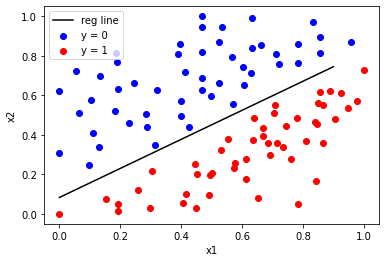

In [4]:
"""
All code is from https://www.geeksforgeeks.org/understanding-logistic-regression/ by Nikhil Kumar
"""

import csv 
import numpy as np 
import matplotlib.pyplot as plt 

def loadCSV(filename): 
    ''' 
    function to load dataset 
    '''
    with open(filename,"r") as csvfile: 
        lines = csv.reader(csvfile) 
        dataset = list(lines) 
        for i in range(len(dataset)): 
            dataset[i] = [float(x) for x in dataset[i]]      
    return np.array(dataset) 

def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 

def logistic_func(beta, X):
    ''' 
    logistic(sigmoid) function 
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 

def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    return np.dot((logistic_func(beta, X) - y.reshape(X.shape[0], -1)).T, X) 

def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    y = np.squeeze(y)  
    final = -(y * np.log(logistic_func(beta, X))) - ((1 - y) * np.log(1 - logistic_func(beta, X))) 
    return np.mean(final) 

def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta -= lr * log_gradient(beta, X, y)
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter

def pred_values(beta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)

def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
    
if __name__=='__main__':
    dataset = loadCSV('Data\\binary_data.csv') 
      
    # normalizing feature matrix 
    X = normalize(dataset[:, :-1]) 
      
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
  
    # response vector 
    y = dataset[:, -1] 
  
    # initial beta values 
    beta = np.matrix(np.zeros(X.shape[1])) 
  
    # beta values after running gradient descent 
    beta, num_iter = grad_desc(X, y, beta) 
  
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", beta) 
    print("No. of iterations:", num_iter) 
  
    # predicted labels 
    y_pred = pred_values(beta, X) 
      
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(y == y_pred)) 
      
    # plotting regression line 
    plot_reg(X, y, beta) 

In [5]:
from sklearn.linear_model import LogisticRegression

dataset = loadCSV('Data\\binary_data.csv')
X = normalize(dataset[:, :-1]) 
y = dataset[:, -1] 
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
print(clf.score(X, y))

[1. 1.]
[[0.27172645 0.72827355]
 [0.28587674 0.71412326]]
0.99


<h5 style="text-align: center;">Note: Gradient descent is one of the many way to estimate &beta; Basically, these are more advanced algorithms which can be easily run in Python once you have defined your cost function and your gradients. These algorithms are:<ul><li>BFGS(Broyden–Fletcher–Goldfarb–Shanno algorithm)</li><li>L-BFGS(Like BFGS but uses limited memory)</li><li>Conjugate Gradient<li></ul></h5>
<h5 style="text-align: center;">Advantages/disadvantages of using any one of these algorithms over Gradient descent:</h5><h5 style="text-align: center;"><br>Advantages:<br><ul><li>Don’t need to pick learning rate</li><li>Often run faster (not always the case)</li><li>Can numerically approximate gradient for you (doesn’t always work out well)</li></ul><br>Disadvantages:<ul><li>More complex</li><li>More of a black box unless you learn the specifics</li></ul></h5>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Confusion Matrix : 
 [[12  0]
 [ 0 13]]
Accuracy :  1.0


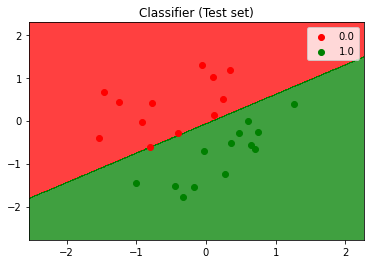

In [7]:
"""
This part is from https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
"""
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        X, y, test_size = 0.25, random_state = 0) 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j) 
      
plt.title('Classifier (Test set)') 
plt.legend() 
plt.show() 